In [48]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Leemos los datos del archivo \\C4wadpninv004\ANALISIS II-DGGE\02. SME\GUSTAVO\B200m_CONSIGNADAS.csv
DIR_PATH = '\\\\C4wadpninv004\\ANALISIS II-DGGE\\02. SME\\GUSTAVO\\'
FILE_PATH = DIR_PATH + 'B200m_CONSIGNADAS.csv'
data = pd.read_csv(FILE_PATH, sep=',', encoding='latin-1')
data

,Etiquetas,Sector,Consigna,Long,Lat,C05-CENTRALES CAMIONERAS,C06-CENTROS COMERCIALES,C09-CUARTELES DE LA POLICÍA AUXILIAR,C10-CUARTELES PBI,C11-CUARTELES PGJ,...,C62-OXXO,C67-CENTROS PILARES,C72-ACCESOS METRO,C73-ATRACTIVOS TURISTICOS,C75-FONOTECAS,C76-FOTOTECA,C77-GALERIAS,C78-ZONAS ARQUEOLOGICAS,C81-ESTACIONES DE CABLEBUS,C82-ALCALDIAS
0,10534,MORELOS,26,-99.136881,19.444434,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
1,2566,MORELOS,21,-99.132804,19.444939,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,6691,MORELOS,21,-99.136777,19.445221,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,2560,MORELOS,20,-99.132794,19.444180,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
4,2232,MORELOS,18,-99.131108,19.449400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,10128,ALAMEDA,1,-99.141230,19.428914,0,1,0,0,0,...,2,0,2,0,0,0,1,0,0,0
239,10132,ALAMEDA,1,-99.138377,19.433688,0,1,0,0,0,...,2,0,0,4,0,0,0,0,0,0
240,10135,ALAMEDA,1,-99.136385,19.432135,0,3,0,0,0,...,2,0,0,1,0,1,3,0,0,0
241,10136,ALAMEDA,1,-99.136158,19.434286,0,3,0,0,0,...,1,0,2,1,0,0,2,0,0,0


In [50]:
# AGRUPACIONES: Los siguientes agrupaciones son para unir las columnas de la base de datos y sumar sus valores
agrupaciones = [['C09-CUARTELES DE LA POLICÍA AUXILIAR','C10-CUARTELES PBI','C11-CUARTELES PGJ','C16-JUZGADOS CIVILES Y PENALES','C20-MINISTERIOR PUBLICOS','C21-MODULOS SSP',],

['C05-CENTRALES CAMIONERAS','C19-METROBUS','C31-TREN LIGERO','C42-TROLEBUS','C43-TURIBUS','C72-ACCESOS METRO','C81-ESTACIONES DE CABLEBUS',],

['C06-CENTROS COMERCIALES','C38-MERCADOS PUBLICOS','C46-ESTABLECIMIENTOS MERCANTILES','C49-TIENDAS DEPARTAMENTALES','C53-CINES','C62-OXXO',],

['C22-MONUMENTOS HISTORICOS', 'C57-EVENTOS MASIVOS', 'C73-ATRACTIVOS TURISTICOS', 'C78-ZONAS ARQUEOLOGICAS',],

['C58-CASAS Y CENTROS DE CULTURA','C59-MUSEOS Y TEATROS','C75-FONOTECAS','C76-FOTOTECA','C77-GALERIAS', ],#'C26-PARQUES Y RECREACION',],

['C23-NOTARIAS','C24-OFICINAS DE GOBIERNO','C27-RECLUSORIOS','C30-TESORERIAS','C82-ALCALDIAS', ],#'C01-BANCOS Y CAJEROS'],

['C15-HOSPITALES','C45-CENTROS DE SALUD Y CLINICAS',],

['C44-GUARDERIAS', 'C67-CENTROS PILARES', ],#'C13-EDUCACIÓN',],

['C33-IGLESIAS Y TEMPLOS',],

['C51-EDIFICIOS',],]

# Cada nueva columna es la suma de las columnas que se encuentran en la lista de agrupaciones con nombre GRUPO-k
for i in range(len(agrupaciones)):
	data['GRUPO-'+str(i+1)] = data[agrupaciones[i]].sum(axis=1)
	# Eliminamos las columnas que ya no se van a utilizar
	data = data.drop(agrupaciones[i], axis=1)

data

,Etiquetas,Sector,Consigna,Long,Lat,GRUPO-1,GRUPO-2,GRUPO-3,GRUPO-4,GRUPO-5,GRUPO-6,GRUPO-7,GRUPO-8,GRUPO-9,GRUPO-10
0,10534,MORELOS,26,-99.136881,19.444434,0,5,1052,4,1,0,1,0,0,0
1,2566,MORELOS,21,-99.132804,19.444939,0,1,168,0,0,1,0,0,0,0
2,6691,MORELOS,21,-99.136777,19.445221,0,2,374,5,1,0,1,0,0,0
3,2560,MORELOS,20,-99.132794,19.444180,0,4,222,0,0,1,0,0,0,0
4,2232,MORELOS,18,-99.131108,19.449400,0,0,239,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,10128,ALAMEDA,1,-99.141230,19.428914,0,8,1722,0,3,0,0,0,0,0
239,10132,ALAMEDA,1,-99.138377,19.433688,0,0,1200,4,3,1,0,0,0,0
240,10135,ALAMEDA,1,-99.136385,19.432135,0,1,1409,1,13,0,0,0,1,0
241,10136,ALAMEDA,1,-99.136158,19.434286,0,3,2176,1,8,3,0,0,1,0


In [58]:
# Seleccionamos las columnas que nos interesan. Empiezan con C\d\d-
# X = data.filter(regex='^C\d+-')
X = data.filter(regex='^GRUPO-\d+')

print('----------------------')
print('Media de cada variable')
print('----------------------')
print(X.mean(axis=0))

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(X.var(axis=0))

print('-------------------------')
print('Desviacion estandar de cada variable')
print('-------------------------')
print(X.std(axis=0))

----------------------
Media de cada variable
----------------------
GRUPO-1       0.106996
GRUPO-2       2.333333
GRUPO-3     695.983539
GRUPO-4       1.637860
GRUPO-5       2.720165
GRUPO-6       0.386831
GRUPO-7       0.251029
GRUPO-8       0.074074
GRUPO-9       0.534979
GRUPO-10      0.493827
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
GRUPO-1          0.186852
GRUPO-2          8.512397
GRUPO-3     295911.817910
GRUPO-4          8.876577
GRUPO-5         14.846988
GRUPO-6          1.048090
GRUPO-7          0.238377
GRUPO-8          0.068871
GRUPO-9          0.514267
GRUPO-10         7.994796
dtype: float64
-------------------------
Desviacion estandar de cada variable
-------------------------
GRUPO-1       0.432263
GRUPO-2       2.917601
GRUPO-3     543.977773
GRUPO-4       2.979359
GRUPO-5       3.853179
GRUPO-6       1.023763
GRUPO-7       0.488239
GRUPO-8       0.262432
GRUPO-9       0.717124
GRUPO-10      2.827507
dtype: float64

In [52]:
# Creamos una instancia del objeto PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_

array([[-0.03241138,  0.36485687,  0.07506763,  0.49013572,  0.53199305,
         0.43536858, -0.02421848, -0.11741562,  0.34086618, -0.12975232],
       [ 0.43465797,  0.16261849, -0.36337319,  0.29450284,  0.08850124,
        -0.0584935 , -0.48043224,  0.35510456, -0.34433673,  0.28128198],
       [ 0.05773634,  0.3886781 ,  0.58889523,  0.06444592, -0.06035356,
        -0.322021  , -0.32031853, -0.39906963, -0.33327066, -0.11989598],
       [ 0.64163972,  0.1672711 , -0.18747986,  0.03098435, -0.21869107,
         0.02707907,  0.41695036, -0.49828999,  0.1189348 ,  0.19840629],
       [-0.05885332,  0.09582385,  0.43584146, -0.13166601,  0.0291589 ,
         0.07863725,  0.0280892 ,  0.18262079,  0.22039775,  0.83085003],
       [-0.00546708, -0.33062478, -0.08432735, -0.27267492, -0.01003665,
         0.52083758, -0.53782009, -0.48087261, -0.04188588,  0.12481503],
       [ 0.54373235, -0.3436904 ,  0.35039352, -0.05505707,  0.0294244 ,
        -0.13294432, -0.25502226,  0.22526696

In [53]:
pca_df = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X.columns,
    index   = [f'PC{x+1}' for x in range(len(modelo_pca.components_))]
)
pca_df

,GRUPO-1,GRUPO-2,GRUPO-3,GRUPO-4,GRUPO-5,GRUPO-6,GRUPO-7,GRUPO-8,GRUPO-9,GRUPO-10
PC1,-0.032411,0.364857,0.075068,0.490136,0.531993,0.435369,-0.024218,-0.117416,0.340866,-0.129752
PC2,0.434658,0.162618,-0.363373,0.294503,0.088501,-0.058493,-0.480432,0.355105,-0.344337,0.281282
PC3,0.057736,0.388678,0.588895,0.064446,-0.060354,-0.322021,-0.320319,-0.399070,-0.333271,-0.119896
PC4,0.641640,0.167271,-0.187480,0.030984,-0.218691,0.027079,0.416950,-0.498290,0.118935,0.198406
PC5,-0.058853,0.095824,0.435841,-0.131666,0.029159,0.078637,0.028089,0.182621,0.220398,0.830850
PC6,-0.005467,-0.330625,-0.084327,-0.272675,-0.010037,0.520838,-0.537820,-0.480873,-0.041886,0.124815
PC7,0.543732,-0.343690,0.350394,-0.055057,0.029424,-0.132944,-0.255022,0.225267,0.499766,-0.276292
PC8,0.030818,0.597897,-0.043636,-0.382690,-0.441021,0.351077,-0.135951,0.282310,0.165219,-0.223562
PC9,0.297696,-0.116569,0.335050,-0.179639,0.240184,0.446142,0.343665,0.227195,-0.555618,-0.134518
PC10,-0.079219,-0.231727,0.215340,0.628077,-0.635356,0.291847,0.021971,0.076907,-0.062634,0.001328


In [60]:
# Obtencion de los residuales del pca
residuales = pca_pipe.named_steps['standardscaler'].transform(X)
# Guardar en un excel
residuales = pd.DataFrame(residuales)
residuales.to_excel(DIR_PATH + 'residuales.xlsx')

In [54]:
pca_df.sum(axis=1)

PC1     1.934490
PC2     0.370031
PC3    -0.455174
PC4     0.696805
PC5     1.710900
PC6    -1.118057
PC7     0.585578
PC8     0.200460
PC9     0.903588
PC10    0.226535
dtype: float64

In [ ]:
id, lat, log, time, date, grp1_freq, grp1_val,  grp1_2req, grp2_val,  grp3_freq, grp1_val, 
1	1	1	1		2		32		0.032		32		   0.36		32		 0.07		32

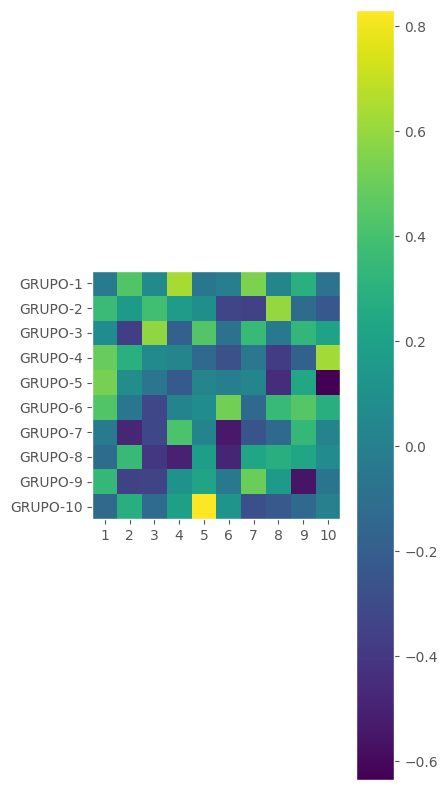

In [55]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
fig.set_figheight(10)
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='equal')
plt.yticks(range(len(X.columns)), X.columns, )# fontsize=1)
plt.xticks(range(len(modelo_pca.components_)), np.arange(modelo_pca.n_components_) + 1, )# fontsize=3)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.22593815 0.15084482 0.11364463 0.10513264 0.09712496 0.07849635
 0.07586846 0.06993327 0.05155626 0.03146046]


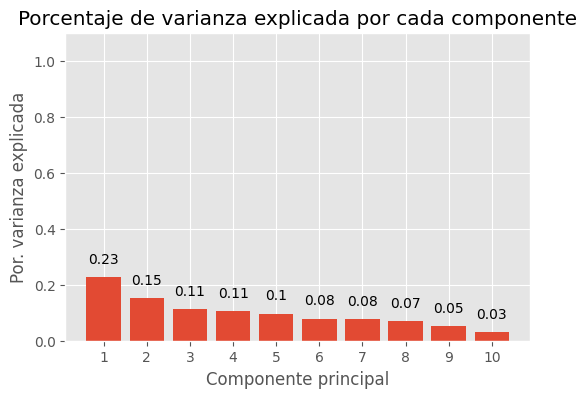

In [56]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

,0,1,2,3,4,5,6,7,8,9
0,-0.248036,0.915879,0.655820,0.794471,-0.447349,-0.378632,1.537193,-0.282843,-0.747546,-0.175012
1,-0.248036,-0.457940,-0.972601,-0.550870,-0.707410,0.600172,-0.515213,-0.282843,-0.747546,-0.175012
2,-0.248036,-0.114485,-0.593127,1.130807,-0.447349,-0.378632,1.537193,-0.282843,-0.747546,-0.175012
3,-0.248036,0.572425,-0.873127,-0.550870,-0.707410,0.600172,-0.515213,-0.282843,-0.747546,-0.175012
4,-0.248036,-0.801394,-0.841812,-0.550870,-0.707410,-0.378632,-0.515213,-0.282843,-0.747546,-0.175012
...,...,...,...,...,...,...,...,...,...,...
238,-0.248036,1.946244,1.890030,-0.550870,0.072774,-0.378632,-0.515213,-0.282843,-0.747546,-0.175012
239,-0.248036,-0.801394,0.928451,0.794471,0.072774,0.600172,-0.515213,-0.282843,-0.747546,-0.175012
240,-0.248036,-0.457940,1.313451,-0.214535,2.673391,-0.378632,-0.515213,-0.282843,0.649790,-0.175012
241,-0.248036,0.228970,2.726345,-0.214535,1.373083,2.557782,-0.515213,-0.282843,0.649790,-0.175012


2
3
4
5
6
7
8
9


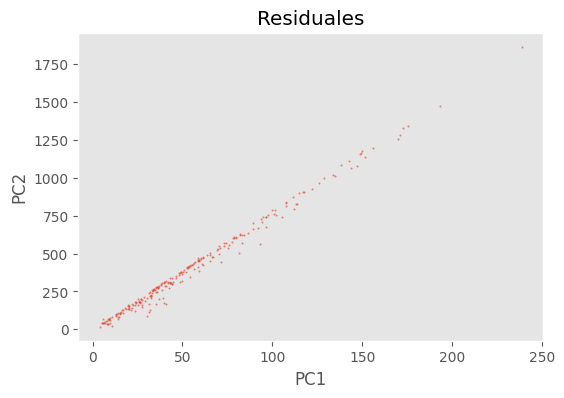

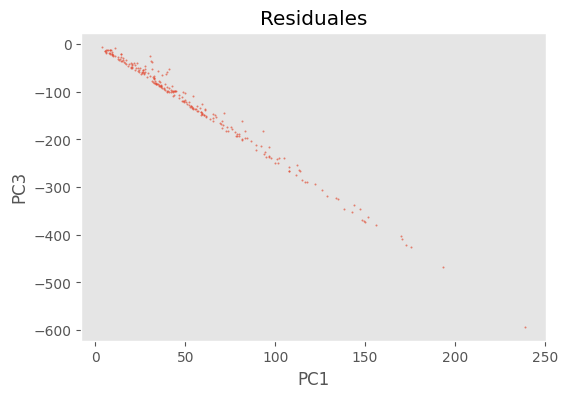

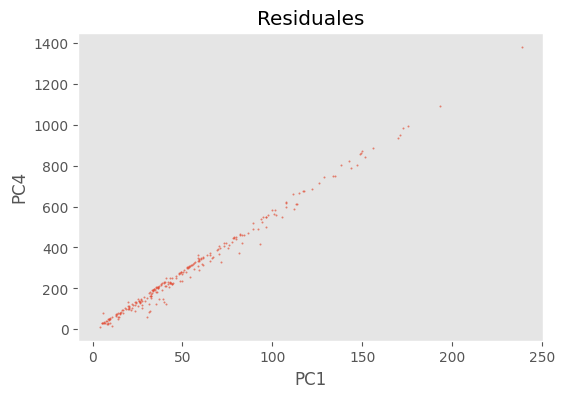

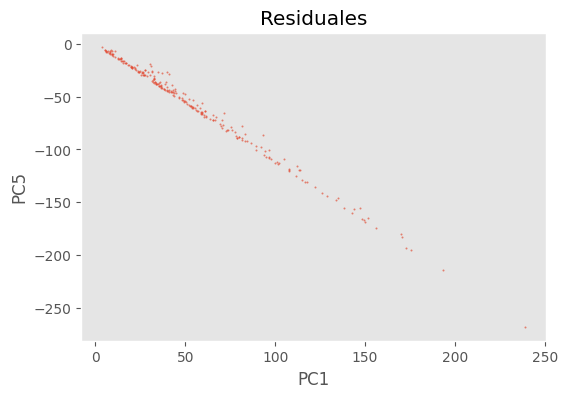

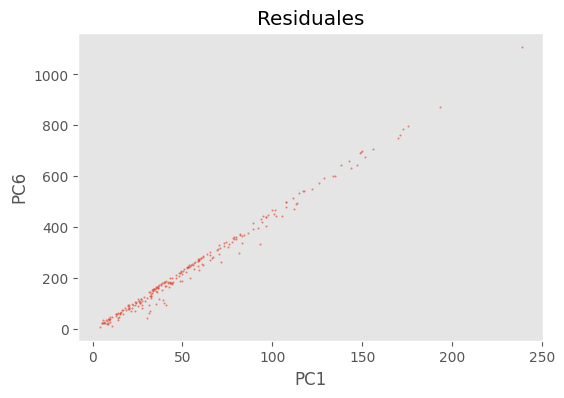

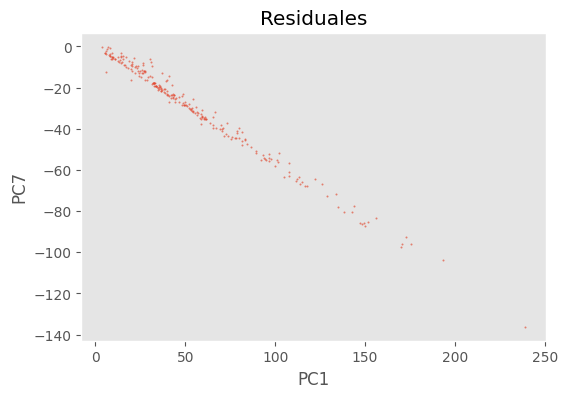

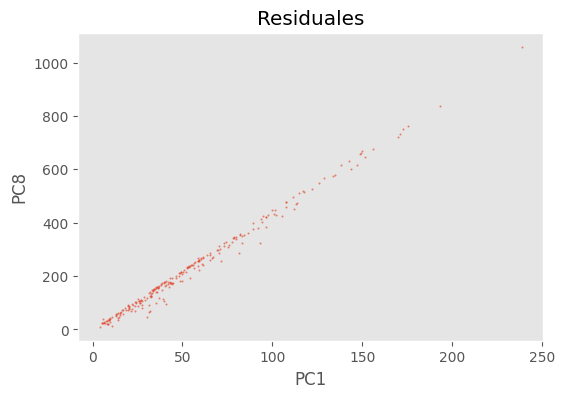

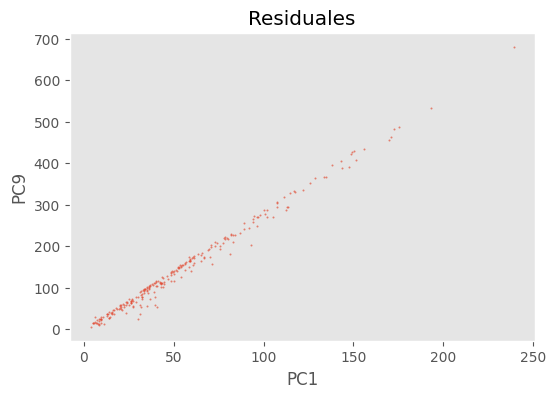

In [73]:
# Realizar la grafica de dispercion de los componentes principales
# ==============================================================================

for i in range(2,len(modelo_pca.components_)):
    
	fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
	ax.scatter(
		x = modelo_pca.transform(X)[:, 0],
		y = modelo_pca.transform(X)[:, i],
		s = 1,
		alpha = 0.5
	)
	ax.set_title('Residuales')
	ax.set_xlabel('PC1')
	ax.set_ylabel(f'PC{i}')
	ax.grid();
	fig.show()
	print(i)



------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.22593815 0.37678296 0.49042759 0.59556023 0.69268519 0.77118154
 0.84705001 0.91698328 0.96853954 1.        ]


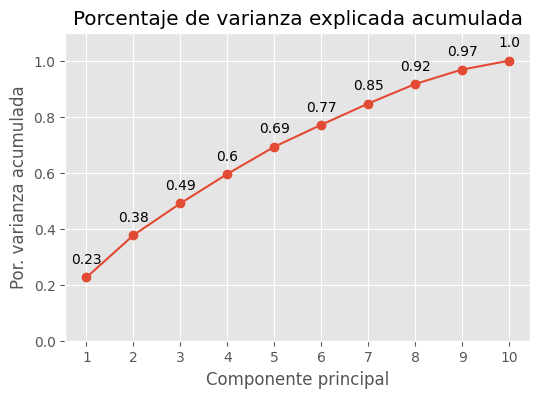

In [57]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [76]:
# Realizar el clustering con los componentes principales
# ==============================================================================
# Seleccionamos el número de componentes que vamos a utilizar
# ------------------------------------------------------------------------------
n_componentes = 3

# Creamos una instancia del objeto PCA
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=n_componentes))

# Ajustamos el modelo
pca_pipe.fit(X)

# Obtenemos los datos transformados
pca_datos = pca_pipe.transform(X)

# Creamos un dataframe con los datos transformados
pca_df = pd.DataFrame(
    data    = pca_datos,
	columns = [f'PC{x+1}' for x in range(n_componentes)]
	
)

# Creamos un dataframe con los datos transformados y la variable objetivo
pca_df = pd.concat([pca_df, y], axis=1)
pca_df.head()

# Grafico de dispercion de los componentes principales
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(
    x = pca_df['PC1'],
    y = pca_df['PC2'],
    s = 1,
    alpha = 0.5
)
ax.set_title('Residuales')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.grid();


TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

# Ayuda


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Leemos los datos del archivo \\C4wadpninv004\ANALISIS II-DGGE\02. SME\GUSTAVO\B200m_CONSIGNADAS.csv
DIR_PATH = '\\\\C4wadpninv004\\ANALISIS II-DGGE\\02. SME\\GUSTAVO\\'
FILE_PATH = DIR_PATH + 'B200m_CONSIGNADAS.csv'
data = pd.read_csv(FILE_PATH, sep=',', encoding='latin-1')

In [94]:

# AGRUPACIONES: Los siguientes agrupaciones son para unir las columnas de la base de datos y sumar sus valores
agrupaciones = [['C09-CUARTELES DE LA POLICÍA AUXILIAR','C10-CUARTELES PBI','C11-CUARTELES PGJ','C16-JUZGADOS CIVILES Y PENALES','C20-MINISTERIOR PUBLICOS','C21-MODULOS SSP',],

['C05-CENTRALES CAMIONERAS','C19-METROBUS','C31-TREN LIGERO','C42-TROLEBUS','C43-TURIBUS','C72-ACCESOS METRO','C81-ESTACIONES DE CABLEBUS',],

['C06-CENTROS COMERCIALES','C38-MERCADOS PUBLICOS','C46-ESTABLECIMIENTOS MERCANTILES','C49-TIENDAS DEPARTAMENTALES','C53-CINES','C62-OXXO',],

['C22-MONUMENTOS HISTORICOS', 'C57-EVENTOS MASIVOS', 'C73-ATRACTIVOS TURISTICOS', 'C78-ZONAS ARQUEOLOGICAS',],

['C58-CASAS Y CENTROS DE CULTURA','C59-MUSEOS Y TEATROS','C75-FONOTECAS','C76-FOTOTECA','C77-GALERIAS', ],#'C26-PARQUES Y RECREACION',],

['C23-NOTARIAS','C24-OFICINAS DE GOBIERNO','C27-RECLUSORIOS','C30-TESORERIAS','C82-ALCALDIAS', ],#'C01-BANCOS Y CAJEROS'],

['C15-HOSPITALES','C45-CENTROS DE SALUD Y CLINICAS',],

['C44-GUARDERIAS', 'C67-CENTROS PILARES', ],#'C13-EDUCACIÓN',],

['C33-IGLESIAS Y TEMPLOS',],

['C51-EDIFICIOS',],]

In [95]:

# Cada nueva columna es la suma de las columnas que se encuentran en la lista de agrupaciones con nombre GRUPO-k
for i in range(len(agrupaciones)):
	data['GRUPO-'+str(i+1)] = data[agrupaciones[i]].sum(axis=1)
	# Eliminamos las columnas que ya no se van a utilizar
	data = data.drop(agrupaciones[i], axis=1)

	
data = data.filter(regex='^GRUPO-\d+')

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=7)
data_pca = pca.fit_transform(data_normalized)

# Aplicar K-means
k = 3
kmeans = KMeans()#(n_clusters=k)
kmeans.fit(data_pca)

# Asignar etiquetas de cluster y visualizar
labels = kmeans.labels_
labels

array([6, 1, 6, 1, 1, 6, 6, 1, 0, 5, 1, 1, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6,
       1, 1, 1, 5, 1, 2, 1, 2, 2, 2, 1, 6, 1, 1, 2, 5, 2, 1, 6, 5, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 6, 1, 1, 6, 4, 1, 0, 6, 6, 6, 1, 1, 1, 6,
       1, 1, 1, 6, 1, 1, 1, 6, 6, 1, 0, 1, 0, 1, 6, 1, 0, 1, 1, 7, 6, 1,
       0, 6, 0, 2, 1, 1, 0, 6, 6, 0, 1, 1, 1, 6, 2, 3, 0, 1, 2, 1, 6, 1,
       6, 2, 6, 1, 6, 6, 6, 6, 0, 1, 0, 6, 1, 3, 4, 0, 1, 1, 4, 3, 1, 2,
       0, 1, 4, 0, 1, 1, 1, 1, 4, 4, 1, 1, 6, 1, 1, 1, 6, 1, 1, 1, 6, 6,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 3, 6, 0, 1, 3, 1,
       0, 2, 6, 7, 1, 0, 1, 6, 1, 3, 1, 1, 0, 5, 7, 0, 1, 1, 1, 3, 1, 2,
       2, 6, 7, 7, 7, 3, 3, 0, 3, 6, 6, 7, 3, 7, 0, 1, 1, 7, 1, 0, 1, 6,
       1, 1, 7, 0, 3, 0, 1, 6, 1, 6, 1, 3, 1, 3, 1, 1, 1, 0, 0, 1, 0, 3,
       3])

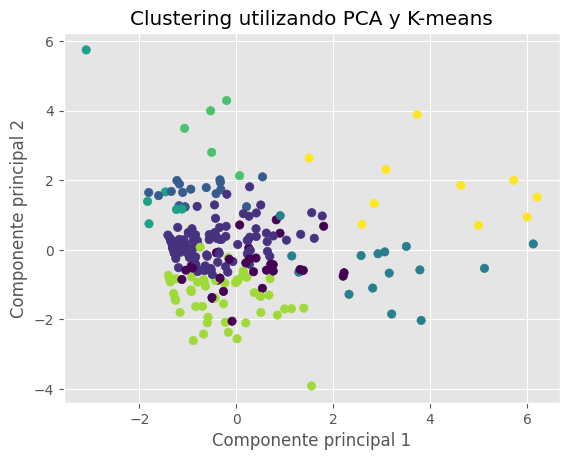

In [96]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clustering utilizando PCA y K-means')
plt.show()


plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clustering utilizando PCA y K-means')
plt.show()


In [97]:
len(kmeans.labels_)
# Separar los datos en grupos
data['CLUSTER'] = kmeans.labels_
data.groupby('CLUSTER').size()

CLUSTER
0     31
1    107
2     17
3     16
4      6
5      5
6     51
7     10
dtype: int64